K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#for PCA
from sklearn.decomposition import PCA #Using the PCA function in sklearn module
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [13]:
#import dataset
df = pd.read_csv('irisData.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#Target variables into y 
x = df.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y= df.loc[:,'Species']

In [46]:
#Applying PCA for dimensionality reduction and choosing the features to plot the scatter plot for visualization of data
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = StandardScaler().fit_transform(x)
#pca 
pca = PCA()
pca_data = pca.fit_transform(x)
#pca_data = pca.transform(x)
pca_data

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

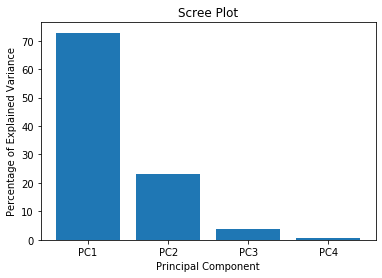

In [50]:
#Plotting the scree plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
#using matplotlib to create a scree plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [93]:
#Considering the first 2 PC (PC1 & PC2) and plotting the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)
finalDf
principalDf.shape

(150, 2)

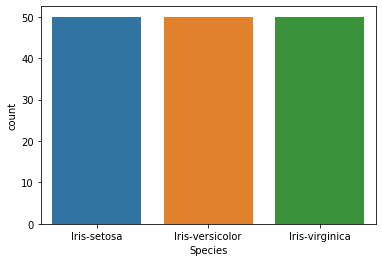

In [69]:
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

sns.countplot(x="Species", data=df)

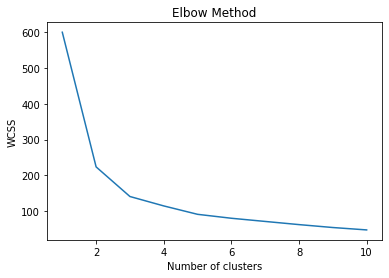

In [80]:
#elbow method to find the number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    #Inertia measures how well a dataset was clustered by K-Means
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#The plot shows that 3 clusters is a perfect fit for the given data

In [103]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
label = kmeans.fit_predict(principalDf)
# kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


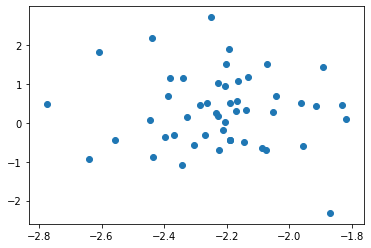

In [111]:
#Visualizing the clusters for label=0 for understanding
#filter rows of original data
filtered_label0 = principalDf[label == 0]
filtered_label0
plt.scatter(filtered_label0.iloc[:,0], filtered_label0.iloc[:,1])
plt.show()

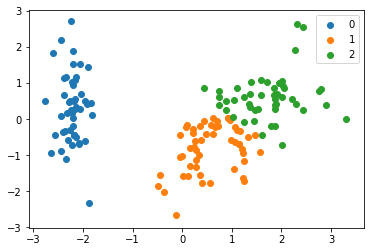

In [116]:
#Plotting all clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(principalDf.iloc[label==i,0], principalDf.iloc[label==i,1], label=i)
plt.legend()
plt.show()

[[-2.22019328  0.29222482]
 [ 0.56713803 -0.8076751 ]
 [ 1.72236912  0.59990509]]


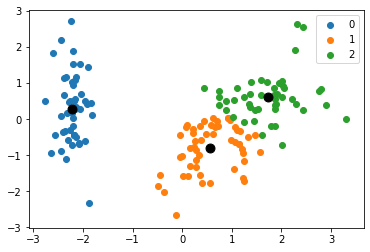

In [121]:
#Plotting the cluster centroids
#kmeans.cluster_centers_ return an array of centroids locations.
centroids = kmeans.cluster_centers_
print(centroids)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(principalDf.iloc[label==i,0], principalDf.iloc[label==i,1], label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()